In [114]:
import pandas as pd
import numpy as np
from numpy import fft

In [115]:
data = np.loadtxt('input01.txt', skiprows=1)
data.size

500

In [162]:
data = data.astype(int)

In [163]:
data

array([1339, 1462, 1702, 1656, 1439, 1208, 1613, 1935, 1964, 2003, 2023,
       1559, 1274, 1805, 2051, 2024, 2049, 1998, 1441, 1257, 1559, 1643,
       1464, 1521, 1576, 1381, 1372, 1610, 1926, 2018, 1930, 1868, 1551,
       1471, 1954, 2079, 2061, 2001, 2031, 1574, 1165, 1366, 1384, 1342,
       1543, 1509, 1598, 1349, 1625, 1932, 2079, 1857, 1443, 1332, 1149,
       1471, 1595, 1498, 1433, 1401, 1178,  972, 1283, 1468, 1456, 1466,
       1378, 1208, 1038, 1344, 1379, 1418, 1466, 1414, 1129,  948, 1285,
       1373, 1379,  599,  614,  850,  672,  747,  732,  834,  996,  900,
        792,  688,  781,  696,  834, 1026,  974, 1001,  997, 1110, 1212,
       1301, 1322, 1253,  935,  857, 1082, 1112, 1291, 1391, 1384, 1089,
        963, 1174, 1420, 1349, 1338, 1335, 1075,  952, 1376, 1586, 1571,
       1543, 1525, 1223, 1066, 1555, 1704, 1745, 1749, 1687, 1288, 1152,
       1492, 1728, 1742, 1732, 1510, 1288, 1280, 1659, 1852, 1823, 1723,
       1416, 1187, 1014, 1324, 1618, 1736, 1552, 15

In [164]:
# Define function for Fourier extrapolation of given timeseries.


def FFT(data, N_predictions):  # data is numpy array, N_predictions as integer.
    
    n = data.size
    harmonics = 500  # Number of harmonics, the more harmonics the more complex signal can be described.
    t = np.arange(0, n)  # Array immitating the sequential time.
    p = np.polyfit(t, data, 1)  # In arguments "1" means fitting the linear trend to historical data: (kx + b)

    # Removing trend from the data. It's like descaling according intercept by time.
    # p[0] is the coefficient determining the angle of the function as it's multiplied with polynomial.
    data_detrended = data - p[0]*t

    data_freq_domain = fft.fft(data_detrended)  # Compute the one-dimensional discrete Fourier Transform.

    f = fft.fftfreq(n)  # Discrete Fourier Transform sample frequencies.

    # WHAT ARE WE DOING HERE? Looks like a folded zipped array [0, 1, 499, 2, 498, 3, 497, ...]
    indexes = list(range(n))
    indexes.sort(key = lambda i: np.absolute(f[i]))

    t = np.arange(0, n + N_predictions)  # Array immitating the sequential time includeing the interval to predict.

    restored_signal = np.zeros(t.size)  # Creating zero base for signal to be restored, allowing then to update values.

    # Iteratively update the values of restored signal.
    for i in indexes[:1 + harmonics*2]:
        amplification = np.absolute(data_freq_domain[i]) / n  # Calculating prediction aplitude.
        phase = np.angle(data_freq_domain[i])  # Calculating prediction phase.
        restored_signal += amplification * np.cos(2 * np.pi * f[i] * t + phase)  # This is FFT itself.
    
    result =  restored_signal + p[0]*t  # Returning the scaling 

    result = [int(i) for i in result]
    
    return result

In [175]:
restored_signal = FFT(data, 30)

In [176]:
real_signal = np.append(data, [1808, 1454, 1393,1733,1944,1911,1804,1525,573,576,740,
                               760,784,746,713,598,619,711,766,716,803,718,562,499,573,746,679,658,694,545])

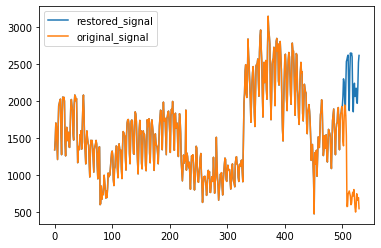

In [177]:
import matplotlib.pyplot as plt
plt.plot(restored_signal, label='restored_signal')
plt.plot(real_signal, label = 'original_signal')
plt.legend()

In [206]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.Series(data), model="multiplicative")
trend    = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

AttributeError: 'RangeIndex' object has no attribute 'inferred_freq'

In [209]:
ts_log = data

ts_log.index

AttributeError: 'numpy.ndarray' object has no attribute 'index'

# HackerRank upload

In [112]:
import pandas as pd
import numpy as np
from numpy import fft

N = int(input())

data = np.array([])

for i in range(N):
    data = np.append(data, [int(input())])
    
# Define function for Fourier extrapolation of given timeseries.


def FFT(data, N_predictions):  # data is numpy array, N_predictions as integer.
    
    n = data.size
    harmonics = 500  # Number of harmonics, the more harmonics the more complex signal can be described.
    t = np.arange(0, n)  # Array immitating the sequential time.
    p = np.polyfit(t, data, 1)  # In arguments "1" means fitting the linear trend to historical data: (kx + b)

    # Removing trend from the data. It's like descaling according intercept by time.
    # p[0] is the coefficient determining the angle of the function as it's multiplied with polynomial.
    data_detrended = data - p[0]*t

    data_freq_domain = fft.fft(data_detrended)  # Compute the one-dimensional discrete Fourier Transform.

    f = fft.fftfreq(n)  # Discrete Fourier Transform sample frequencies.

    # WHAT ARE WE DOING HERE? Looks like a folded zipped array [0, 1, 499, 2, 498, 3, 497, ...]
    indexes = list(range(n))
    indexes.sort(key = lambda i: np.absolute(f[i]))

    t = np.arange(0, n + N_predictions)  # Array immitating the sequential time includeing the interval to predict.

    restored_signal = np.zeros(t.size)  # Creating zero base for signal to be restored, allowing then to update values.

    # Iteratively update the values of restored signal.
    for i in indexes[:1 + harmonics*2]:
        amplification = np.absolute(data_freq_domain[i]) / n  # Calculating prediction aplitude.
        phase = np.angle(data_freq_domain[i])  # Calculating prediction phase.
        restored_signal += amplification * np.cos(2 * np.pi * f[i] * t + phase)
    
    result = restored_signal + p[0]*t  # Returning the scaling
    
    result = [int(i) for i in result]
    

    return result


extrapolation = FFT(data, 30)


for i in range(N,len(extrapolation)):
    print(extrapolation[i])

10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
